<a href="https://colab.research.google.com/github/DevMachTech/notebooks/blob/master/WELFakeNews_Word2vec_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Word2vec CNN

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive'

Mounted at /content/drive
/content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gensim.models.word2vec import Word2Vec
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPool1D, GlobalMaxPool1D, Embedding, Activation
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import PorterStemmer
from sklearn import preprocessing
from sklearn.metrics import classification_report

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/hate_speech/WELFake_Dataset.csv")
df = df.iloc[:,[2,-1]]
df.columns = ["text", "label"]
df.head()

,text,label
0,No comment is expected from Barack Obama Membe...,1
1,Did they post their votes for Hillary already?,1
2,"Now, most of the demonstrators gathered last ...",1
3,A dozen politically active pastors came here f...,0
4,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [ ]:
df = df.sample(frac=0.07)
df.describe()
df.isnull().sum()

df.dropna(inplace=True)
df.isnull().sum()

text     0
label    0
dtype: int64

In [ ]:
def preprocess_text(sen):
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)
    
    stops = stopwords.words('english')
    #print(stops)
    porter = PorterStemmer()
    for word in sentence.split():
        if word in stops:
            sentence = sentence.replace(word, '')
        sentence = sentence.replace(word, porter.stem(word))
    return sentence.lower()

In [ ]:
df['Message'] = df['text'].apply(preprocess_text)
df.head(10)

,text,label,Message
50491,I was scrolling through Instagram when I saw i...,0,i scro stagra saw w fuzz b babi seal snug...
3215,BRASILIA (Reuters) - Brazilian President Miche...,0,brilia reuter brazili presid micl temer face s...
15846,"Friday on ABC’s “The View,” former and execu...",0,friday abc view fr execut produc com vh s...
47529,"Posted on July 15, 2015 by Dr. Eowyn | 33 Comm...",1,post juli dr eowyn comnt it psi turvi wld ...
30660,"Pittsfield, New Hampshire is an unlikely place...",1,ptsfield new hampshir unlik place someth li...
53156,Homeless man looking a bit down today for some...,1,homeless man look bit ay rean homeless man ...
47062,CHICAGO/WASHINGTON (Reuters) - President Donal...,0,chicago hgt reuter presid dald trump said fri...
16687,21st Century Wire says The US media s neoMcCar...,1,st centuri wire say us media neomccarthi lik...
2922,Walt Whitman’s America Through Edward Weston’s...,1,walt whm arica edward west eye jord rief thi ...
58678,MELBOURNE (Reuters) - The man accused of delib...,0,melbourn reuter m accus delir plow chrtma s...


In [ ]:
mes = []
for i in df['Message']:
    mes.append(i.split())
print(mes[:2])

[['i', 'scro', 'stagra', 'saw', 'w', 'fuzz', 'b', 'babi', 'seal', 'snuggl', 'sdrt', 'st', 'pili', 's', 'clear', 'black', 'eye', 'squeal', 'scen', 'tap', 'car', 'art', 'neh', 'pho', 'tter', 'liev', 'like', 'n', 'ad', 'capti', 'newbn', 'harp', 'seal', 'hide', 'hd', 'piec', 'sea', 'ice', 'seek', 'slter', 'durg', 'blizzard', 'said', 'aww', 'it', 'nt', 'wh', 'cli', 'loss', 'sea', 'ice', 'harp', 'seal', 'losg', 'ir', 'birthg', 'ground', 'oh', 'in', 'ad', 'percent', 'p', 'die', 'due', 'po', 'ice', 'cd', 'in', 'alost', 'ne', 'surviv', 'as', 'type', 'babi', 'harp', 'seal', 'strugglg', 'surviv', 'yet', 'terribl', 'ice', 'year', 'near', 'agdalen', 'isls', 'oh', 'god', 'ca', 'stagra', 'get', 'quick', 'babi', 'i', 'fix', 'left', 'wh', 'hryg', 'ssag', 'cli', 'chg', 'could', 'wipe', 'p', 'face', 'plet', 's', 'ltle', 'friend', 'o', 'paul', 'nicklen', 'wildl', 'phograpr', 'ok', 'iag', 'k', 'wh', 'g', 'hg', 'cute', 'i', 'pictur', 'like', 'ba', 'el', 'ld', 'hook', 'inteectuy', 'underst', 'th', 'cli', 'ch

In [ ]:
word2vec_model = Word2Vec(mes, size=500, window=3, min_count=1, workers=16)
print(word2vec_model)

Word2Vec(vocab=79431, size=500, alpha=0.025)


In [ ]:
token = Tokenizer(7229)
token.fit_on_texts(df['Message'])
text = token.texts_to_sequences(df['Message'])
text = pad_sequences(text, 75)
print(text[:2])

[[1043  518   17 6593    2 1161  612  846   47   27   20   19 2592    2
  2230 3625  554   11 1683 2247 4659 2665   12  581 1833 1478  132    2
   581  492   44  946 2504 1382 1145   15 2705  999  393    1   37    6
  2334  341  140 3881  178 5780    2    4   29   67  341  665   15 2248
  2619  472 5338   16  653  255 3170   58  178    1  660   38  438  956
   248   58  307  582  417]
 [1660   30    8   64 3714  801 6019   13  249 3384    4 2274 2538  481
   166   35 2849  155   13   53  459  403 2324  751  846    4  156 3714
  1212 3714  120   13  102 2303  751  279  202   15  744 2304  782  199
   260   87  689  133   57  248 5077 1120 1289   57 6020  120   70   23
   348 2779 3714  801  735  306 5077  360  170 1852  233  286 4738    4
  3038  311  188    1  223]]


In [ ]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(df['label'])
y = to_categorical(y)
y[:2]

array([[1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(np.array(text), y, test_size=0.2, stratify=y)

In [ ]:
keras_model = Sequential()
keras_model.add(word2vec_model.wv.get_keras_embedding(True))
keras_model.add(Dropout(0.2))
keras_model.add(Conv1D(50, 3, activation='relu', padding='same', strides=1))
keras_model.add(Conv1D(50, 3, activation='relu', padding='same', strides=1))
keras_model.add(MaxPool1D())
keras_model.add(Dropout(0.2))
keras_model.add(Conv1D(100, 3, activation='relu', padding='same', strides=1))
keras_model.add(Conv1D(100, 3, activation='relu', padding='same', strides=1))
keras_model.add(MaxPool1D())
keras_model.add(Dropout(0.2))
keras_model.add(Conv1D(200, 3, activation='relu', padding='same', strides=1))
keras_model.add(Conv1D(200, 3, activation='relu', padding='same', strides=1))
keras_model.add(GlobalMaxPool1D())
keras_model.add(Dropout(0.2))
keras_model.add(Dense(200))
keras_model.add(Activation('relu'))
keras_model.add(Dropout(0.2))
keras_model.add(Dense(2))
keras_model.add(Activation('softmax'))
keras_model.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer='adam')
keras_model.fit(x_train, y_train, batch_size=16, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
253/253 [==============================] - 115s 447ms/step - loss: 0.6941 - acc: 0.5031 - val_loss: 0.6832 - val_acc: 0.5604
Epoch 2/20
253/253 [==============================] - 113s 447ms/step - loss: 0.6878 - acc: 0.5326 - val_loss: 0.6771 - val_acc: 0.6089
Epoch 3/20
253/253 [==============================] - 113s 448ms/step - loss: 0.5813 - acc: 0.6791 - val_loss: 0.5247 - val_acc: 0.7188
Epoch 4/20
253/253 [==============================] - 113s 448ms/step - loss: 0.4915 - acc: 0.7489 - val_loss: 0.4701 - val_acc: 0.7634
Epoch 5/20
253/253 [==============================] - 114s 450ms/step - loss: 0.3741 - acc: 0.8391 - val_loss: 0.4716 - val_acc: 0.7861
Epoch 6/20
253/253 [==============================] - 113s 448ms/step - loss: 0.2720 - acc: 0.8970 - val_loss: 0.5298 - val_acc: 0.7505
Epoch 7/20
253/253 [==============================] - 113s 448ms/step - loss: 0.2169 - acc: 0.9260 - val_loss: 0.5504 - val_acc: 0.7663
Epoch 8/20
253/253 [============================

In [ ]:
y_pred=keras_model.predict(x_test)

In [ ]:
def plot_metrics(pred, true_labels):
    """Plots a ROC curve with the accuracy and the AUC"""
    acc = accuracy_score(true_labels, np.array(pred.flatten() >= .5, dtype='int'))
    fpr, tpr, thresholds = roc_curve(true_labels, pred)
    auc = roc_auc_score(true_labels, pred)

    fig, ax = plt.subplots(1, figsize=(8,8))
    ax.plot(fpr, tpr, color='red')
    ax.plot([0,1], [0,1], color='black', linestyle='--')
    ax.set_title(f"AUC: {auc}\nACC: {acc}");
    return fig

def warmup(epoch, lr):
    """Used for increasing the learning rate slowly, this tends to achieve better convergence.
    However, as we are finetuning for few epoch it's not crucial.
    """
    return max(lr +1e-6, 2e-5)

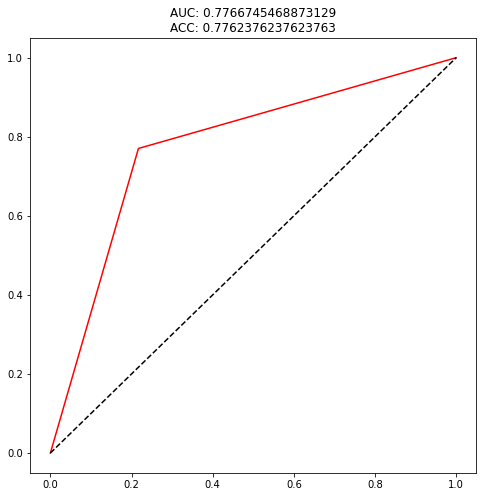

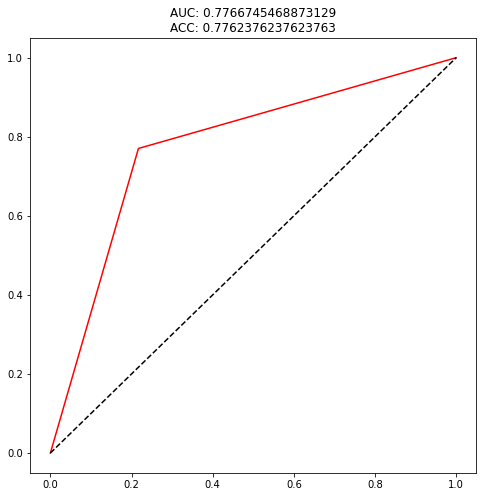

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
plot_metrics(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

In [ ]:
print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))

              precision    recall  f1-score   support

           0       0.78      0.75      0.77       492
           1       0.77      0.80      0.79       518

    accuracy                           0.78      1010
   macro avg       0.78      0.78      0.78      1010
weighted avg       0.78      0.78      0.78      1010



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

array([[368, 124],
       [102, 416]])

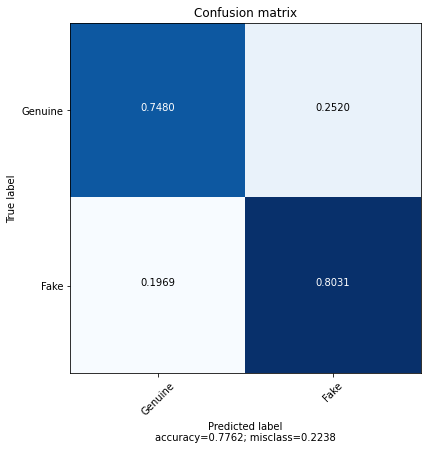

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    # plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
labels = ["Genuine",  "Fake"]

plot_confusion_matrix(cm,labels,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True)
 